<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Aproximaciones básicas al análisis exploratorio de datos </center></font></h1>
<h2><font color='0B5345'> <center>
Estadística Descriptiva y Pruebas de Hipótesis</center></font></h2>
<font  face="Courier New" size="3">
<p1><center> Juliana Moreno Rada - Luisa María Zapata Saldarriaga</center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

# **Estadística descriptiva**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
!pip install pingouin

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

**Features Dataframe**


* Group --> Class
* Age --> Age
* EDUC --> Years of Education
* SES --> Socioeconomic Status / 1-5
* MMSE --> Mini Mental State Examination
* CDR --> Clinical Dementia Rating
* eTIV --> Estimated total intracranial volume
* nWBV --> Normalize Whole Brain Volume
* ASF --> Atlas Scaling Factor

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Señales/EDA - Pruebas de H/alzheimer.csv')
#data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Catedra - Bioseñales/EDA - Pruebas de H/alzheimer.csv')
data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [6]:
cantidad_nan_por_columna = data.isna().sum()
cantidad_nan_por_columna

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

**Medidas de tendencia central**

Mediana y media

In [7]:
data['Age'].mean(), data['Age'].median()

(77.01340482573727, 77.0)

In [8]:
data.iloc[:,2].mean(),data.iloc[:,2].median()

(77.01340482573727, 77.0)

In [9]:
data.iloc[:,2:4].mean()

Age     77.013405
EDUC    14.597855
dtype: float64

Desviación estándar

In [10]:
data['Age'].std()

7.640957297993596

Pruena de normalidad

In [11]:
#statistic, p_value = stats.kstest(data['Age'],'norm')
statistic, p_value = stats.normaltest(data['ASF'])
#statistic, p_value = stats.shapiro(datos)
# Define un nivel de significancia
alpha = 0.05

# Comprueba si los datos siguen una distribución normal
if p_value < alpha:
    print("Los datos NO siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Los datos siguen una distribución normal.


In [ ]:
statistic,p_value

## **Graficos**

**Histrograma de frecuenciaas**

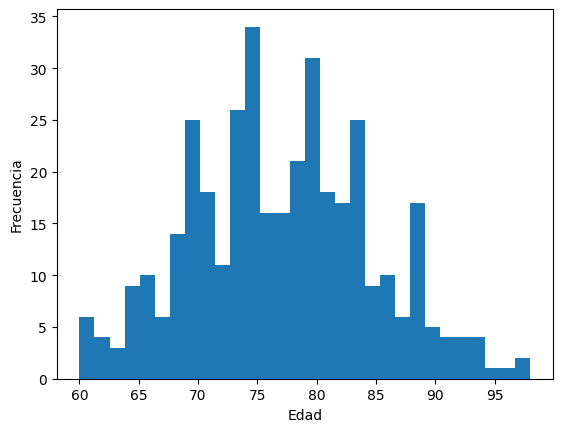

In [12]:
plt.hist(data['Age'], bins=30)
plt.ylabel('Frecuencia')
plt.xlabel('Edad');

**Boxplot**

<Axes: xlabel='Age'>

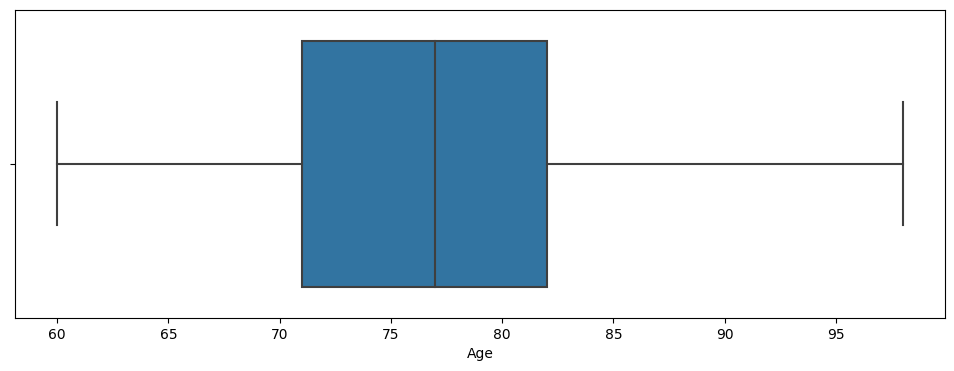

In [13]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=data['Age'])


In [14]:
data2 = data.iloc[:,2:4]
data2

,Age,EDUC
0,87,14
1,88,14
2,75,12
3,76,12
4,80,12
...,...,...
368,82,16
369,86,16
370,61,13
371,63,13


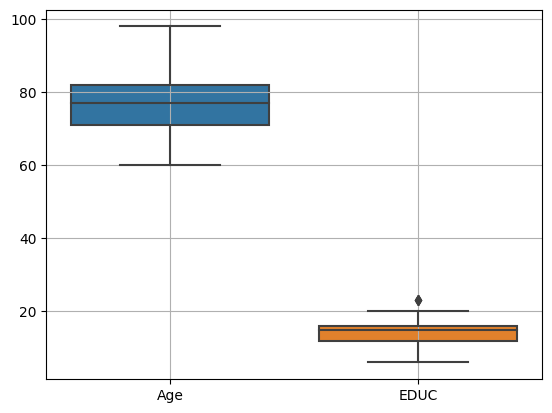

In [15]:
sns.boxplot(data2)
plt.grid()

In [20]:
age_non=data.loc[data.Group =='Nondemented', ['Age']]
age_dem=data.loc[data.Group != 'Nondemented', ['Age']]

([<matplotlib.axis.XTick at 0x7f795022f220>,
 [Text(0, 0, 'Edad Nondemented'), Text(1, 0, 'Edad Demented')])

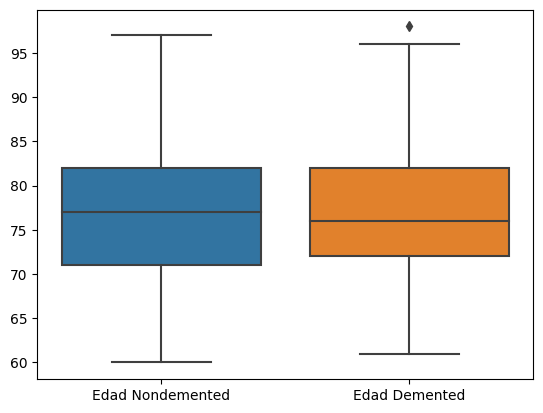

In [21]:
sns.boxplot([age_non,age_dem])
plt.xticks([0,1], ['Edad Nondemented','Edad Demented'])

# **Estadística Inferencial**


## Pruebas de Hipótesis

### *Pruebas paramétricas*

Hipótesis


H0
 : no hay diferencia entre el nivel de demencia y el volumen intracraneal. El promedio de las diferencias es cero ( μd=0).

Ha
 : sí hay diferencia entre el nivel de demencia y el volumen intracraneal. El promedio de las diferencias no es cero ( μd≠0
 ).


### T-test

In [22]:
data.groupby('Group').size()

Group
Converted       37
Demented       146
Nondemented    190
dtype: int64

In [23]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=data, dv='eTIV', group='Group')

,W,pval,normal
Group,,,
Nondemented,0.970108,0.000436,False
Demented,0.971257,0.003673,False
Converted,0.926859,0.017934,False


**Igualdad de varianza (homocedasticidad)**

Existen varios test que permiten comparar varianzas. Dado que no se cumple el criterio de normalidad, uno de los recomendados es el test de Leven.

In [26]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=data, dv='eTIV', group='Group')

,W,pval,equal_var
levene,2.100551,0.123846,True


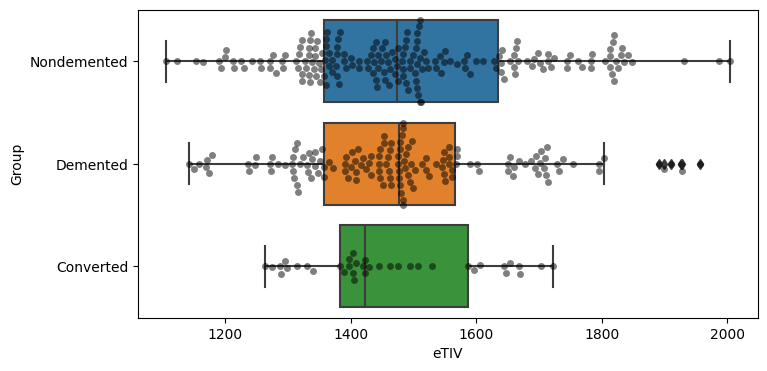

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="Group", x="eTIV", data=data, ax=ax)
sns.swarmplot(y="Group", x="eTIV", data=data, color='black', alpha = 0.5, ax=ax);

33    1406
34    1398
35    1423
36    1587
37    1606
Name: eTIV, dtype: int64


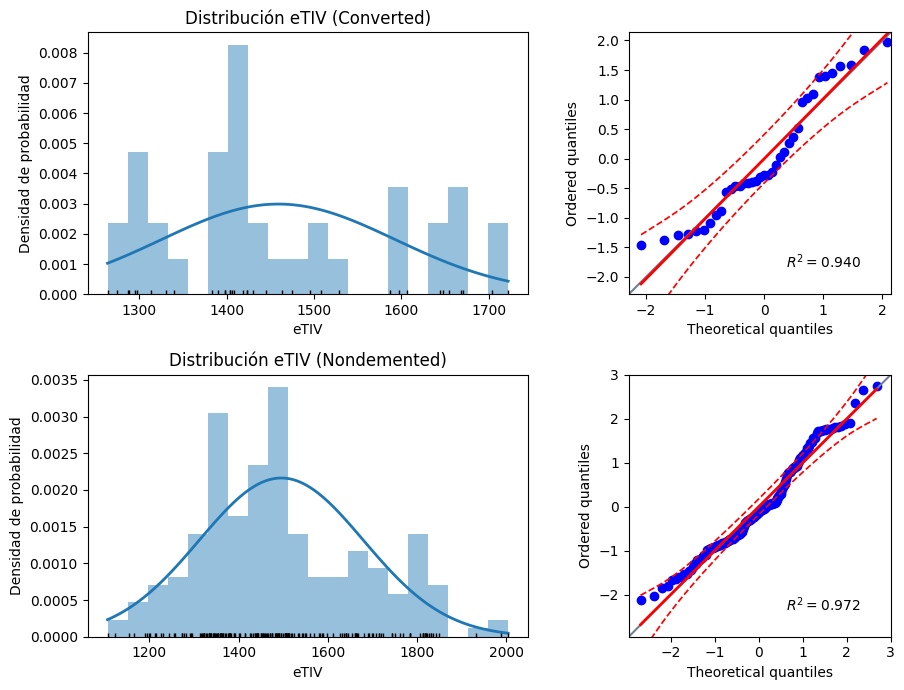

In [28]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

MMSE_CONVERTED = data.loc[data.Group == 'Converted', 'eTIV']
print(MMSE_CONVERTED.head())
# Valores de la media (mu) y desviación típica (sigma) de cada grupo
mu, sigma = stats.norm.fit(MMSE_CONVERTED)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(MMSE_CONVERTED), max(MMSE_CONVERTED), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2)
axs[0, 0].hist(x=MMSE_CONVERTED, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(MMSE_CONVERTED, np.full_like(MMSE_CONVERTED, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución eTIV (Converted)')
axs[0, 0].set_xlabel('eTIV')
axs[0, 0].set_ylabel('Densidad de probabilidad')

# Gráfico distribución qq-plot
pg.qqplot(MMSE_CONVERTED, dist='norm', ax=axs[0, 1])

MMSE_nondemented = data.loc[data.Group == 'Nondemented', 'eTIV']
mu, sigma = stats.norm.fit(MMSE_nondemented)
x_hat = np.linspace(min(MMSE_nondemented), max(MMSE_nondemented), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2)
axs[1, 0].hist(x=MMSE_nondemented, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(MMSE_nondemented, np.full_like(MMSE_nondemented, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución eTIV (Nondemented)')
axs[1, 0].set_xlabel('eTIV')
axs[1, 0].set_ylabel('Densidad de probabilidad')

pg.qqplot(MMSE_nondemented, dist='norm', ax=axs[1, 1])
plt.tight_layout();

In [29]:
# Test para datos independientes (p-value, intervalos de confianza)
# ==============================================================================
peso_smokers = data.loc[data.Group == 'Nondemented','eTIV']
peso_nonsmokers = data.loc[data.Group == 'Converted','eTIV']

pg.ttest(x=peso_smokers, y=peso_nonsmokers, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.133313,225,two-sided,0.258289,"[-26.77, 99.22]",0.20365,0.342,0.203856


In [33]:
correlation_matrix = data.corr()
# correlation_AB = correlation_matrix.loc['Group', 'eTIV']
# print("Correlación entre columnas 'Group' y 'eTIV':", correlation_AB)

<ipython-input-33-b8a889db7e10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [34]:
correlation_matrix

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Age,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.518359,-0.012200,0.090095,0.341912,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.035067,-0.241752,0.255576,0.040052,-0.029340,-0.988877,0.213476,1.000000


**Conclusiones**

Dado que p-value (0.003042) es menor que el nivel de significancia alpha (0.05) , se dispone de evidencia suficiente para considerar que existe una diferencia real entre el volumen intracraneal promedio de sujetos con Alzheimer en comparación con sujetos controles. El tamaño de efecto medido por d-Cohen es medio (0.53).

Por lo tanto se rechaza la hipótesis nula
